哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
Taipei = pd.read_csv('A_lvr_land_A.csv', encoding = 'utf-8')
Taichung = pd.read_csv('B_lvr_land_A.csv', encoding = 'utf-8')
Kaohsiung = pd.read_csv('E_lvr_land_A.csv', encoding = 'utf-8')
New_Taipei = pd.read_csv('F_lvr_land_A.csv', encoding = 'utf-8')

c:\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Taichung.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,西區,房地(土地+建物),臺中市西區美村路一段181~210號,28.34,住,NaN,NaN,1090331,土地1建物1車位0,五層,...,52925,NaN,0.0,0,NaN,RPVOMLLKNHPFFAB18CA,104.80,18.34,0.0,NaN
2,西區,房地(土地+建物),臺中市西區梅川西路一段91~120號,52.0,住,NaN,NaN,1090331,土地1建物1車位0,全,...,114379,NaN,0.0,0,NaN,RPPNMLMKNHPFFAB57CA,91.80,0.00,0.0,NaN
3,南區,房地(土地+建物)+車位,臺中市南區建國南路一段211~240號,23.4,住,NaN,NaN,1090418,土地1建物1車位1,十一層,...,68162,坡道平面,24.05,0,NaN,RPUNMLMKNHPFFAB08CA,110.26,19.34,0.0,NaN
4,西區,房地(土地+建物),臺中市西區東興路三段91~120號,84.0,住,NaN,NaN,1090403,土地1建物1車位0,全,...,118142,NaN,0.0,0,NaN,RPSOMLMKNHPFFAB97CA,211.61,0.00,0.0,NaN


In [4]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
Taipei = Taipei.drop(index=[0],axis=0)
Taichung = Taichung.drop(index=[0],axis=0)
Kaohsiung = Kaohsiung.drop(index=[0],axis=0)
New_Taipei = New_Taipei.drop(index=[0],axis=0)

In [5]:
Taipei.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,147825,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN


In [6]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
Taipei['city'] = 'Taipei'
Taichung['city'] = 'Taichung'
Kaohsiung['city'] = 'Kaohsiung'
New_Taipei['city'] = 'New_Taipei'

In [7]:
#4. 將以上四份資料運用pd.concat()串接
data = pd.concat([Taipei, New_Taipei, Taichung, Kaohsiung ], axis = 0)
data.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [8]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [9]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
data = data.rename(columns = columns_mapping)
data.head()

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei


In [10]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df = data.loc[(data.main_use=='住家用')&(data.use_zoning=='住'),analysis_columns]
df.dropna()
df

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11925,Kaohsiung,路竹區,住家用,住,5300000,140.10999999999999,86.24,1090718,37827,3,2,2
12019,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2
12236,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904,5,2,3
12284,Kaohsiung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392,3,2,2


In [11]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df = df.astype(columns_type)
df.info

<bound method DataFrame.info of             city towns main_use use_zoning  total_price  \
1         Taipei   文山區      住家用          住     36000000   
2         Taipei   文山區      住家用          住      5580000   
5         Taipei   文山區      住家用          住     18280000   
7         Taipei   文山區      住家用          住      8000000   
8         Taipei   文山區      住家用          住      2200000   
...          ...   ...      ...        ...          ...   
11925  Kaohsiung   路竹區      住家用          住      5300000   
12019  Kaohsiung   路竹區      住家用          住      5050000   
12236  Kaohsiung   茄萣區      住家用          住      2720000   
12284  Kaohsiung   路竹區      住家用          住      4950000   
12492  Kaohsiung   路竹區      住家用          住      9800000   

       building_area_square_meter  main_building_area    tx_dt  unit_price  \
1                          229.91              110.91  1090406    156583.0   
2                           37.31               24.58  1090317    149558.0   
5                        

In [12]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引

df['tx_dt_year'] = df['tx_dt'].apply(lambda x:int(x[0:3]))
df = df.loc[(df.tx_dt_year>=109)&
                                (df.room_number>=1)&
                                (df.room_number<=5)&
                                (df.hall_number>=1)&
                                (df.hall_number<=2)]
df = df.reset_index(drop=True)
df.head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [13]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df['building_area_square_feet']=df['building_area_square_meter']*0.3025
df['main_building_area_square_feet']=df['main_building_area']*0.3025
df['unit_price_square_feet']=df['unit_price']/0.3025

In [14]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
# 總價total_price  min為0還有主建物面積main_building_area  min為0，價格和地坪不可能有0
df.describe()


,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.895000e+03,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6.895000e+03
mean,1.138583e+07,121.702068,82.081059,94357.875707,2.850906,1.793183,1.733575,109.127774,36.814876,24.829520,3.119269e+05
std,1.159410e+07,62.872658,37.363358,58315.811521,0.898435,0.405052,0.681044,10.609838,19.018979,11.302416,1.927795e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,109.000000,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.955000,60.650000,53520.500000,2.000000,2.000000,1.000000,109.000000,25.093888,18.346625,1.769273e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,109.000000,33.090475,23.894475,2.631736e+05
75%,1.329000e+07,147.495000,95.795000,118721.500000,3.000000,2.000000,2.000000,109.000000,44.617238,28.977987,3.924678e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,990.000000,437.097375,101.567400,2.016873e+06


In [15]:
# 移除後再用.describe()觀察是否還有奇怪的資料?   Ans: 否
df = df.loc[(df.total_price!=0)&(df.main_building_area!=0)]
df.describe()


,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.855000e+03,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6.855000e+03
mean,1.141538e+07,121.758317,82.560015,94541.591101,2.849891,1.792998,1.733187,109.128519,36.831891,24.974404,3.125342e+05
std,1.161634e+07,62.850069,36.940755,58373.196537,0.898280,0.405187,0.680827,10.640749,19.012146,11.174578,1.929692e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,109.000000,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.010000,61.030000,53593.000000,2.000000,2.000000,1.000000,109.000000,25.110525,18.461575,1.771669e+05
50%,8.600000e+06,109.400000,79.090000,79737.000000,3.000000,2.000000,2.000000,109.000000,33.093500,23.924725,2.635934e+05
75%,1.330000e+07,147.440000,95.960000,118877.000000,3.000000,2.000000,2.000000,109.000000,44.600600,29.027900,3.929818e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,990.000000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [16]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
df[df.city=='Taipei']
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
df.loc[df.city=='Taipei'].corr()[['total_price','unit_price_square_feet']]


,total_price,unit_price_square_feet
total_price,1.000000,0.581290
building_area_square_meter,0.864627,0.218185
main_building_area,0.710515,0.112488
unit_price,0.581290,1.000000
room_number,0.326441,-0.100062
hall_number,0.270787,0.004883
health_number,0.598832,0.128217
tx_dt_year,NaN,NaN
building_area_square_feet,0.864627,0.218185
main_building_area_square_feet,0.710515,0.112488


### 時價登入總價(total_price)高度相關的變數:  
建物移轉總面積平方公尺、主建物面積、建物移轉總面積坪、主建物面積坪

### 單價元坪(unit_price_square_feet)高度相關的變數:
單價

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

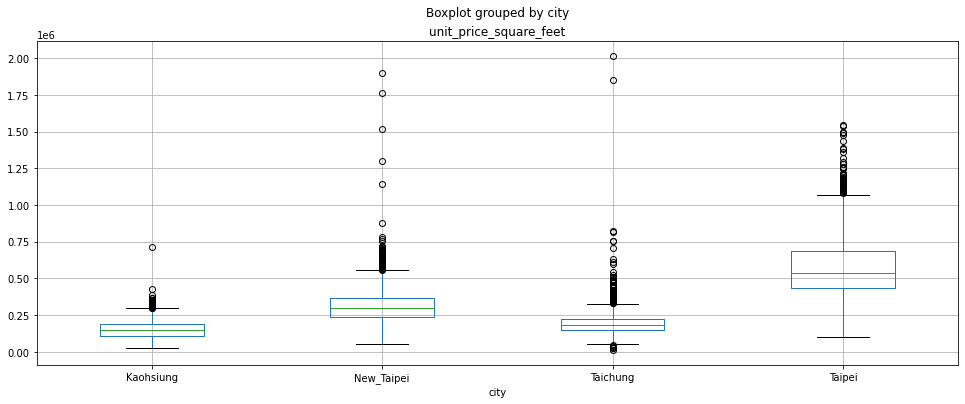

In [17]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
# 中位數最高為: 台北市
df.boxplot(column=['unit_price_square_feet'],by='city',figsize=(16,6))

<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

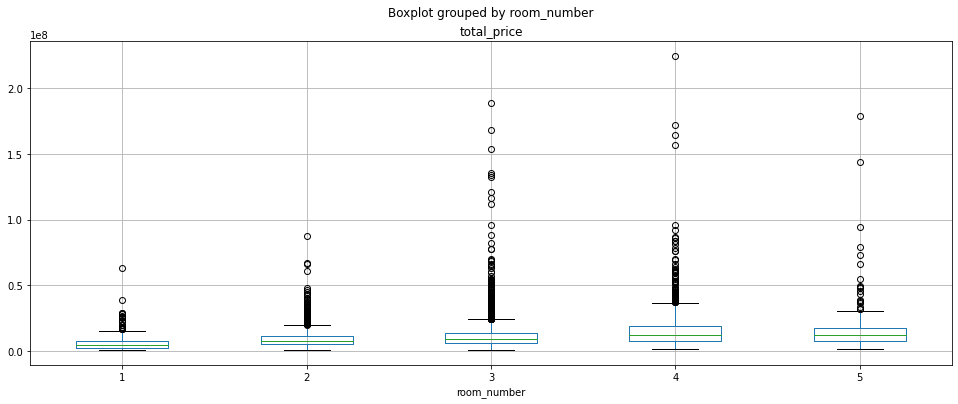

In [18]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
# 總價元(total_price)中位數最高的房間數: 5房
df.boxplot(column=['total_price'],by='room_number',figsize=(16,6))

array(['大安區'], dtype=object)

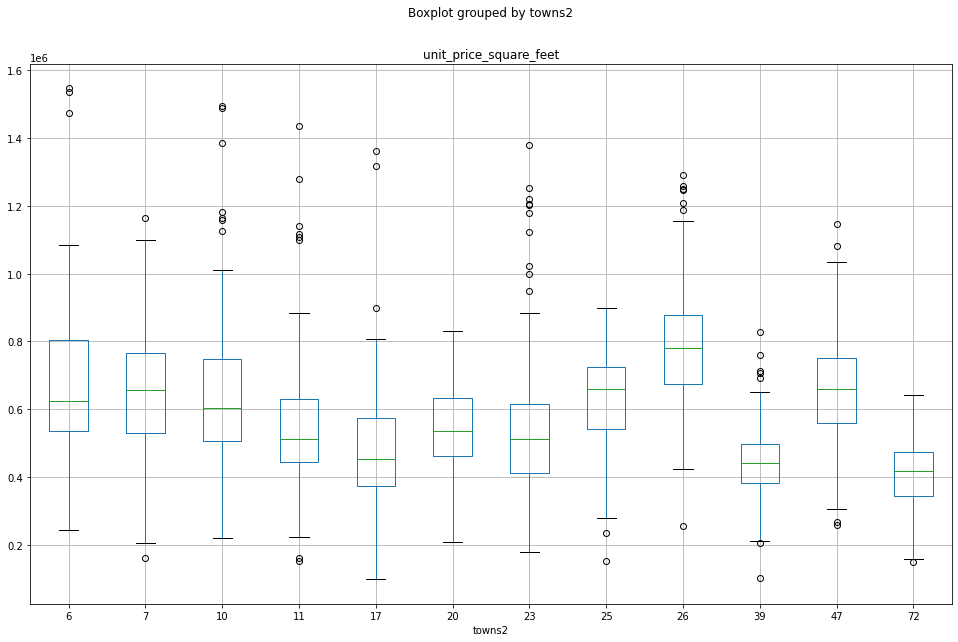

In [23]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(df['towns'].values)
df['towns2'] = le.transform(df['towns'].values)
df.loc[df.city=='Taipei'].boxplot(column=['unit_price_square_feet'],by='towns2',figsize=(16,10))
le.inverse_transform([26])